# Import libraries

In [3]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import numpy as np

# Load and define Data

In [5]:
df = pd.read_csv("data/bank-additional-full.csv" ,sep=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [11]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
import numpy as np

# تحويل كل "unknown" إلى NaN في كل الأعمدة
df.replace('unknown', np.nan, inplace=True)


# explore missing values

In [13]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [14]:
# أولًا: نحدد الأعمدة النوعية والرقمية
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

# تعويض القيم المفقودة في الأعمدة التصنيفية بالـ mode
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

# تعويض القيم المفقودة في الأعمدة الرقمية بالـ median
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)


In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# EDA 

### Who of all the customers is most likely to subscribe?

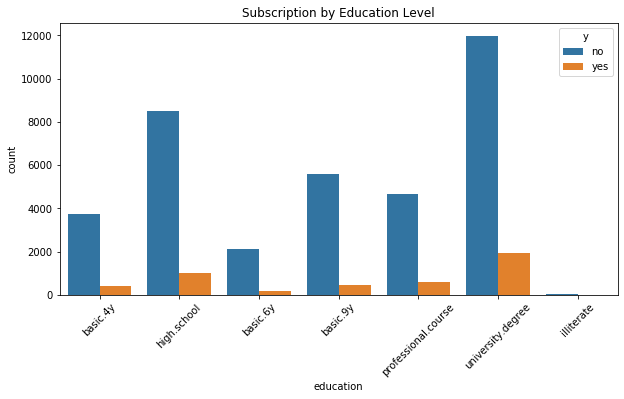

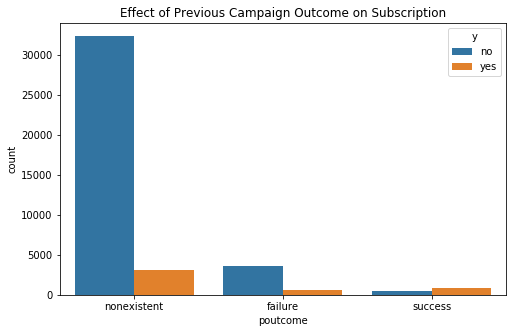

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='y')
plt.title('Subscription by Education Level')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y')
plt.title('Effect of Previous Campaign Outcome on Subscription')
plt.show()


### Does call duration affect the likelihood of subscription?

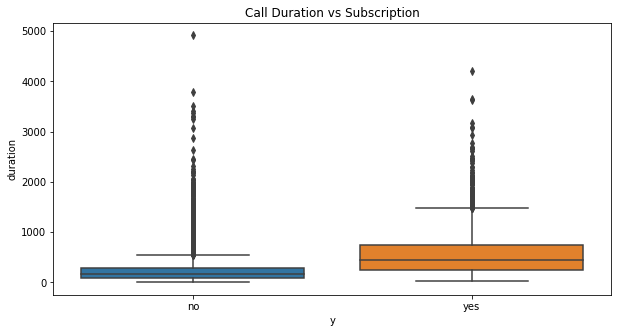

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration vs Subscription')
plt.show()


### What is the best month to run marketing campaigns?

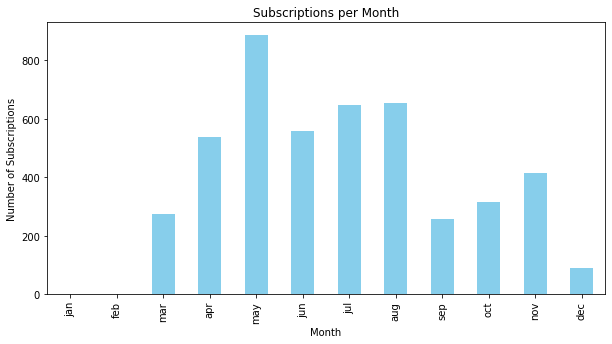

In [18]:
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_subs = df[df['y'] == 'yes']['month'].value_counts().reindex(months_order)

plt.figure(figsize=(10, 5))
month_subs.plot(kind='bar', color='skyblue')
plt.title('Subscriptions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.show()


### Do age and marital status have a combined effect?

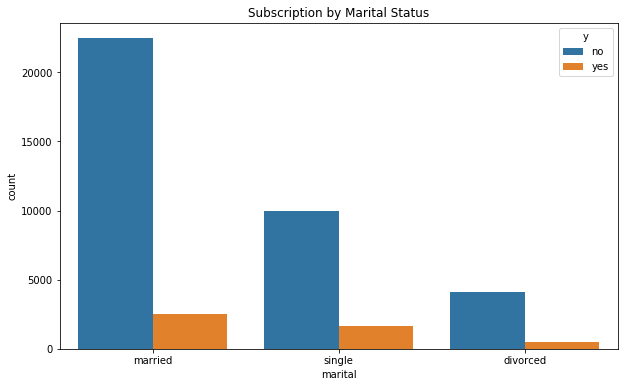

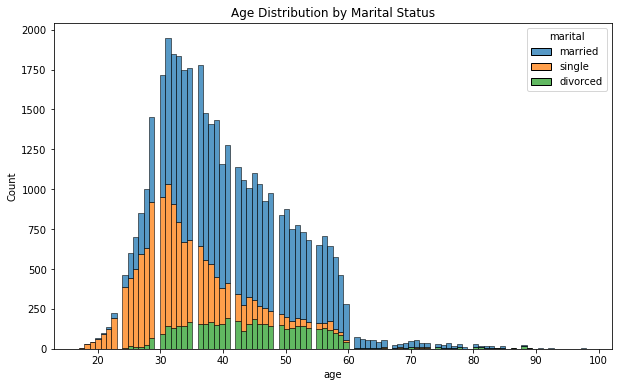

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Subscription by Marital Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='marital', multiple='stack')
plt.title('Age Distribution by Marital Status')
plt.show()


### Does the type of contact affect?

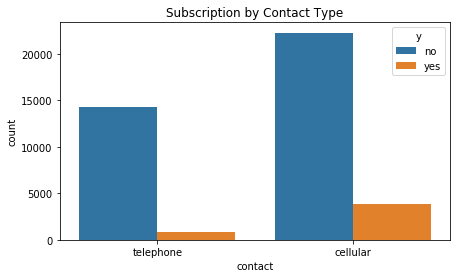

In [20]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contact', hue='y')
plt.title('Subscription by Contact Type')
plt.show()


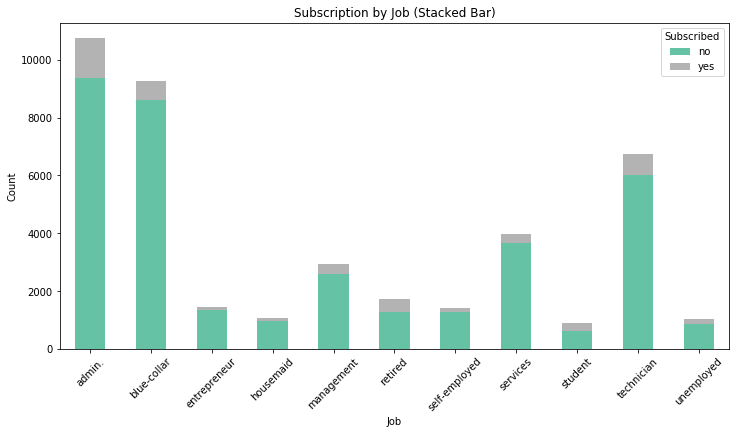

In [21]:
job_y = df.groupby(['job', 'y']).size().unstack()

job_y.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Subscription by Job (Stacked Bar)')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.show()


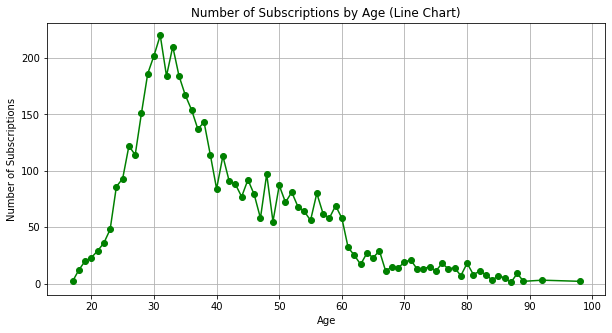

In [22]:
# عدد الاشتراكات حسب العمر (المشتركين فقط)
age_sub = df[df['y'] == 'yes'].groupby('age').size()

plt.figure(figsize=(10, 5))
plt.plot(age_sub.index, age_sub.values, marker='o', color='green')
plt.title('Number of Subscriptions by Age (Line Chart)')
plt.xlabel('Age')
plt.ylabel('Number of Subscriptions')
plt.grid(True)
plt.show()


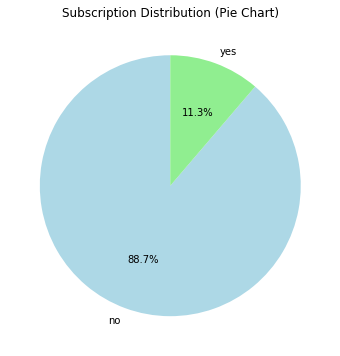

In [23]:
labels = df['y'].value_counts().index
sizes = df['y'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Subscription Distribution (Pie Chart)')
plt.show()


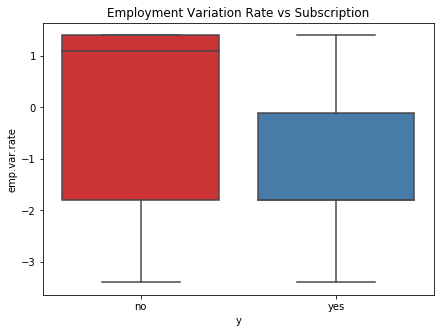

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='y', y='emp.var.rate', palette='Set1')
plt.title('Employment Variation Rate vs Subscription')
plt.show()


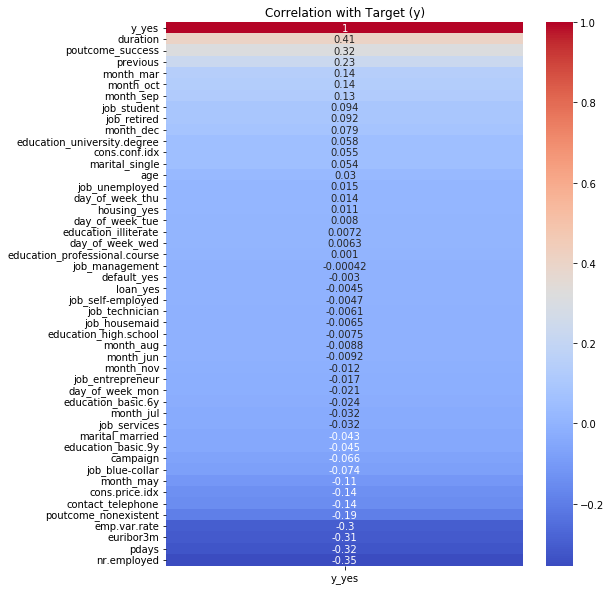

In [25]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()['y_yes'].sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.heatmap(df_encoded.corr()[['y_yes']].sort_values(by='y_yes', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Target (y)')
plt.show()


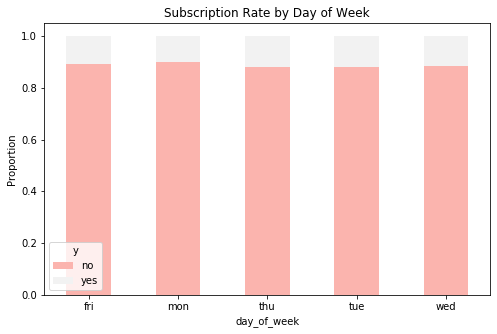

In [26]:
day_ratio = df.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()
day_ratio.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Pastel1')
plt.title('Subscription Rate by Day of Week')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


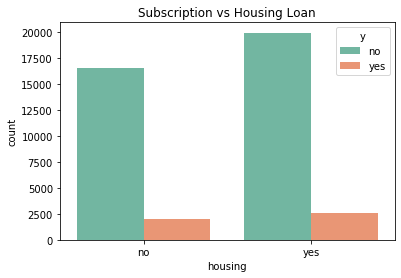

In [27]:
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title('Subscription vs Housing Loan')
plt.show()


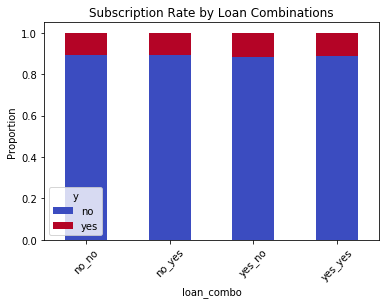

In [28]:
df['loan_combo'] = df['housing'] + '_' + df['loan']

combo_ratio = df.groupby('loan_combo')['y'].value_counts(normalize=True).unstack()
combo_ratio.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Subscription Rate by Loan Combinations')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


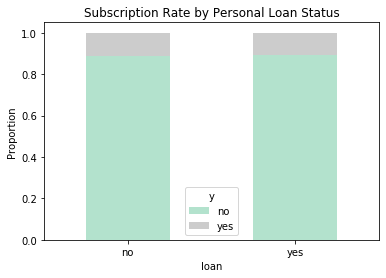

In [29]:
loan_ratio = df.groupby('loan')['y'].value_counts(normalize=True).unstack()
loan_ratio.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Subscription Rate by Personal Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


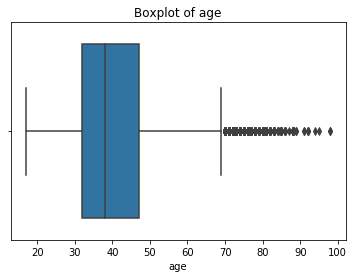

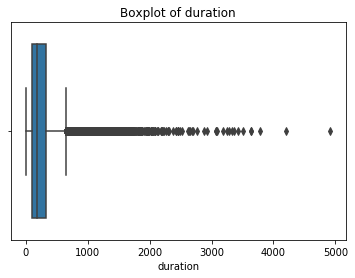

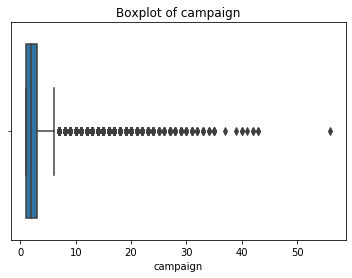

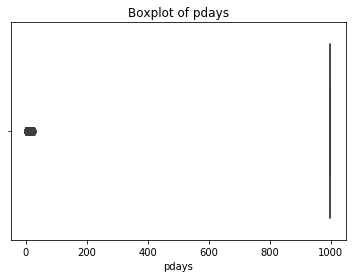

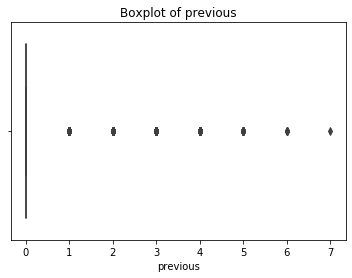

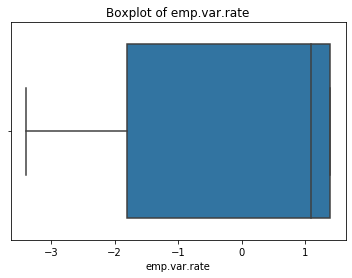

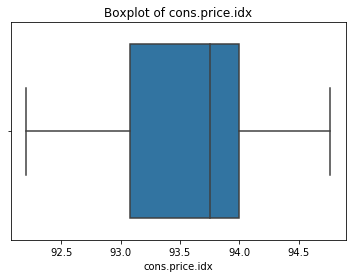

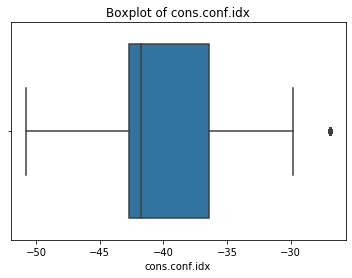

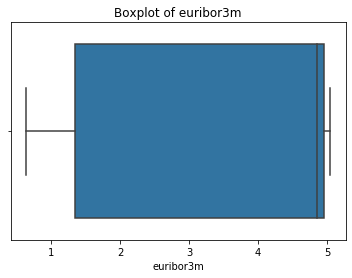

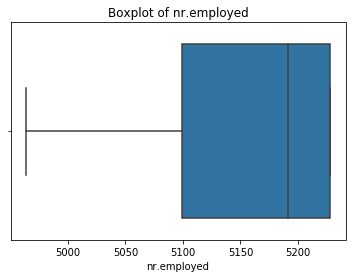

In [30]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [31]:
def winsorize_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # تعيين القيم اللي تحت الحد الأدنى عند الحد الأدنى
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # تعيين القيم اللي فوق الحد الأقصى عند الحد الأقصى
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# تطبيقها على الأعمدة اللي فيها قيم شاذة
for col in df.select_dtypes(include='number').columns:
    df = winsorize_iqr(df, col)


# Feature Engineering 

In [32]:
df['recent_contact'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)


In [33]:
df['has_loan'] = ((df['loan'] == 'yes') | (df['housing'] == 'yes')).astype(int)


In [34]:
df['duration_ratio'] = df['duration'] / df['duration'].mean()


In [69]:
df['duration'].mean()

234.9973171797611

# preprocessing Data

In [35]:
X = df.drop(['y', 'duration', 'pdays'], axis=1)
y = df['y']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = X_train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # لو حابة تستخدمي نفس الترانسفورم

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


 #  1- LogisticRegression


In [37]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred_test = model.predict(X_test)
y_train_prd = model.predict(X_train_res)
print("Accuracy tarin :", accuracy_score(y_train_res, y_train_prd))

print("Accuracy test :", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy tarin : 0.8781330141904599
Accuracy test : 0.8495994173343044

Confusion Matrix:
 [[6214 1089]
 [ 150  785]]

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.85      0.91      7303
         yes       0.42      0.84      0.56       935

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238



# 2 - RandomForest 

In [38]:
# إنشاء نموذج Random Forest
model = RandomForestClassifier(n_estimators=100,max_depth=10,               # تحديد أقصى عمق للشجرة
    min_samples_split=10,       # أقل عدد عينات لتقسيم العقدة
    min_samples_leaf=5,         # أقل عدد عينات في الورقة النهائية
    max_features='sqrt',   random_state=42)

model.fit(X_train_res, y_train_res)

# نعمل التنبؤ
y_pred = model.predict(X_test)
y_train_prd = model.predict(X_train_res)
# نعرض النتائج
print("Accuracy tarin :", accuracy_score(y_train_res, y_train_prd))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy tarin : 0.9263121901179688
Accuracy: 0.8674435542607429

Confusion Matrix:
 [[6344  959]
 [ 133  802]]

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.87      0.92      7303
         yes       0.46      0.86      0.59       935

    accuracy                           0.87      8238
   macro avg       0.72      0.86      0.76      8238
weighted avg       0.92      0.87      0.88      8238



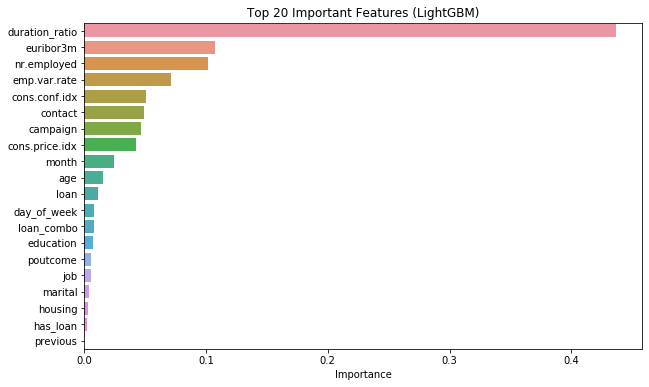

In [39]:
importances = model.feature_importances_
feature_names = X.columns

# ترتيب حسب الأهمية
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features (LightGBM)')
plt.xlabel('Importance')
plt.show()


# 3 - GradientBoosting

In [40]:
# إنشاء نموذج Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

model.fit(X_train_res, y_train_res)

# نعمل التنبؤ
y_pred = model.predict(X_test)
y_train_prd = model.predict(X_train_res)
# نعرض النتائج
print("Accuracy tarin :", accuracy_score(y_train_res, y_train_prd))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy tarin : 0.9200376132672252
Accuracy: 0.8765477057538238

Confusion Matrix:
 [[6441  862]
 [ 155  780]]

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.88      0.93      7303
         yes       0.48      0.83      0.61       935

    accuracy                           0.88      8238
   macro avg       0.73      0.86      0.77      8238
weighted avg       0.92      0.88      0.89      8238



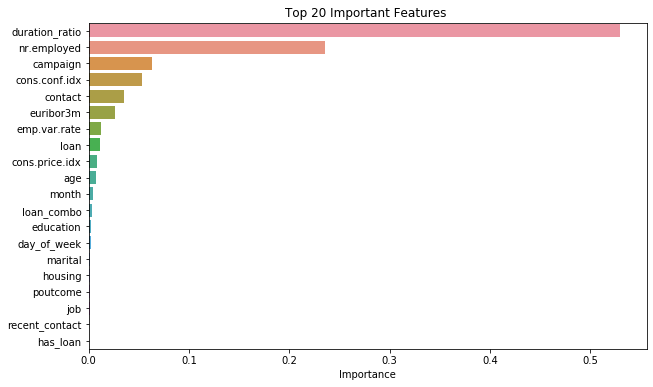

In [41]:
importances = model.feature_importances_
feature_names = X.columns

# ترتيب حسب الأهمية
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features ')
plt.xlabel('Importance')
plt.show()


# 4 - ExtraTrees

In [42]:
model = ExtraTreesClassifier(n_estimators=50,         # تقليل عدد الأشجار
    max_depth=10,            # تحديد أقصى عمق
    min_samples_split=10,    # لا تقسم إلا إذا وُجد عدد كافٍ من العينات
    min_samples_leaf=5      # عدد العينات الأدنى في الورقة
    ,random_state=42)

model.fit(X_train_res, y_train_res)

# نعمل التنبؤ
y_pred = model.predict(X_test)
y_train_prd = model.predict(X_train_res)
# نعرض النتائج
print("Accuracy tarin :", accuracy_score(y_train_res, y_train_prd))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy tarin : 0.9008035561634468
Accuracy: 0.844136926438456

Confusion Matrix:
 [[6175 1128]
 [ 156  779]]

Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.85      0.91      7303
         yes       0.41      0.83      0.55       935

    accuracy                           0.84      8238
   macro avg       0.69      0.84      0.73      8238
weighted avg       0.91      0.84      0.87      8238



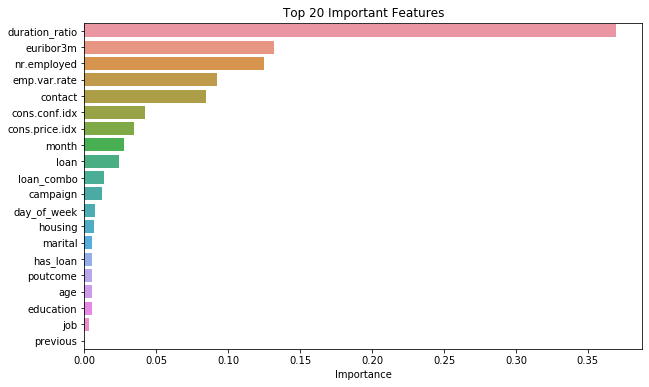

In [43]:
importances = model.feature_importances_
feature_names = X.columns

# ترتيب حسب الأهمية
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.show()


# 5 - support vector machine (svm)

In [44]:
model = SVC()

model.fit(X_train_res, y_train_res)

# نعمل التنبؤ
y_pred = model.predict(X_test)
y_train_prd = model.predict(X_train_res)
# نعرض النتائج
print("Accuracy tarin :", accuracy_score(y_train_res, y_train_prd))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy tarin : 0.7178321080526586
Accuracy: 0.7166788055353241

Confusion Matrix:
 [[5245 2058]
 [ 276  659]]

Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.72      0.82      7303
         yes       0.24      0.70      0.36       935

    accuracy                           0.72      8238
   macro avg       0.60      0.71      0.59      8238
weighted avg       0.87      0.72      0.77      8238



# LGB model

In [45]:
# إنشاء النموذج
model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

# تدريب النموذج
model.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train_res)

# عرض النتائج
print("Accuracy train :", accuracy_score(y_train_res, y_train_pred))
print("Accuracy test  :", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:137: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  "Could not find the number of physical cores for the "
  File "C:\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 29245, number of negative: 29245
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1614
[LightGBM] [Info] Number of data points in the train set: 58490, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy train : 0.9476320738587792
Accuracy test  : 0.8980335032774945

Confusion Matrix:
 [[6695  608]
 [ 232  703]]

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.92      0.94      7303
         yes       0.54      0.75      0.63       935

    accuracy                           0.90      8238
   macro avg       0.75      0.83      0.78      8238
weighted avg       0.92      0.90      0.91      8238



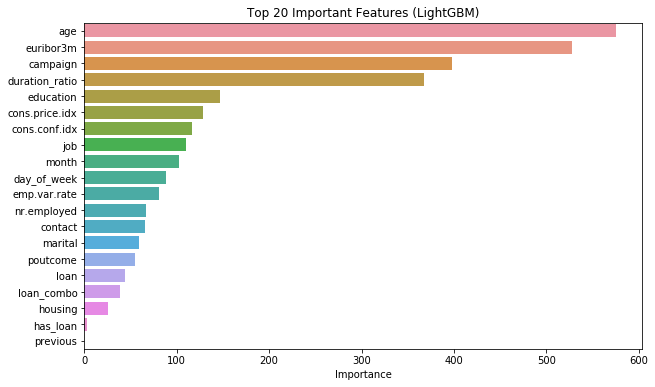

In [46]:
importances = model.feature_importances_
feature_names = X.columns

# ترتيب حسب الأهمية
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]

# رسم
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 20 Important Features (LightGBM)')
plt.xlabel('Importance')
plt.show()


In [47]:
X = df.drop(['y', 'duration', 'pdays','default','previous','recent_contact','has_loan'], axis=1)
y = df['y']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = X_train.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # لو حابة تستخدمي نفس الترانسفورم

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [49]:
model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

# تدريب النموذج
model.fit(X_train_res, y_train_res)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train_res)

# عرض النتائج
print("Accuracy train :", accuracy_score(y_train_res, y_train_pred))
print("Accuracy test  :", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 29245, number of negative: 29245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1612
[LightGBM] [Info] Number of data points in the train set: 58490, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy train : 0.9472730381261754
Accuracy test  : 0.8971837824714737

Confusion Matrix:
 [[6700  603]
 [ 244  691]]

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.92      0.94      7303
         yes       0.53      0.74      0.62       935

    accuracy                           0.90      8238
   macro avg       0.75      0.83      0.78      8238
weighted avg       0.92      0.90      0.90      8238



In [50]:
import joblib

In [52]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
le_job = LabelEncoder()
le_job.fit(df['job'])
joblib.dump(le_job,'job_encode.pkl')

['job_encode.pkl']

In [59]:
le_campaign = LabelEncoder()
le_campaign.fit(df['campaign'])
joblib.dump(le_campaign,'campaign.pkl')

['campaign.pkl']

In [60]:
le_education = LabelEncoder()
le_education.fit(df['education'])
joblib.dump(le_education,'education.pkl')

['education.pkl']

In [62]:
le_month = LabelEncoder()
le_month.fit(df['month'])
joblib.dump(le_month,'month.pkl')

['month.pkl']

In [63]:
le_day_of_week = LabelEncoder()
le_day_of_week.fit(df['day_of_week'])
joblib.dump(le_day_of_week,'day_of_week.pkl')

['day_of_week.pkl']

In [64]:
le_contact = LabelEncoder()
le_contact.fit(df['contact'])
joblib.dump(le_contact,'contact.pkl')

['contact.pkl']

In [65]:
le_marital = LabelEncoder()
le_marital.fit(df['marital'])
joblib.dump(le_marital,'marital.pkl')

['marital.pkl']

In [66]:
le_poutcome = LabelEncoder()
le_poutcome.fit(df['poutcome'])
joblib.dump(le_poutcome,'poutcome.pkl')

['poutcome.pkl']

In [67]:
le_loan = LabelEncoder()
le_loan.fit(df['loan'])
joblib.dump(le_loan,'loan.pkl')

['loan.pkl']

In [68]:
le_housing = LabelEncoder()
le_housing.fit(df['housing'])
joblib.dump(le_housing,'housing.pkl')

['housing.pkl']